In [ ]:
!wget -q https://raw.githubusercontent.com/pvesouza/datasets/main/Dataset_1.csv

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from numpy.ma.core import correlate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
data=pd.read_csv('Dataset.csv')
#data=pd.read_csv('./Dataset_1.csv') 
data.head()

,time,league,pitch,weather,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,dang_attacks_away,attacks_home,attacks_away,possession_home,possession_away,target
0,fh,Israel Youth League,GOOD,GOOD,0,1,2,1,1,1,0,0,62,31,119,72,65%,35%,False
1,lh,Israel Youth League,GOOD,GOOD,1,1,6,2,0,1,0,0,28,14,60,40,64%,36%,True
2,fh,Mali Premiere Division,GOOD,GOOD,0,0,1,3,9,4,12,18,78,57,142,127,51%,49%,False
3,lh,Mali Premiere Division,GOOD,GOOD,0,0,4,3,6,1,10,9,35,30,71,63,50%,50%,False
4,fh,Tanzania Premier Le...,GOOD,GOOD,1,0,7,0,9,4,12,2,83,44,103,87,61%,39%,False


In [7]:
data['corners_home'].value_counts()

2     1280
1     1262
3      993
0      818
4      646
5      412
6      207
7      101
8       45
9       20
10       5
11       4
12       1
13       1
14       1
Name: corners_home, dtype: int64

In [8]:
data['corners_away'].value_counts()

1     1406
2     1256
0     1087
3      920
4      519
5      310
6      168
7       75
8       30
9       18
10       5
13       1
11       1
Name: corners_away, dtype: int64

In [9]:
cpy_dataSet = data.copy()

In [10]:
#Observando as frequências do das classes
cpy_dataSet.drop(columns=['pitch', 'weather', 'league'], inplace=True)
#cpy_dataSet.drop(columns=['pitch', 'weather'], inplace=True)
cpy_dataSet.describe()

,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,dang_attacks_away,attacks_home,attacks_away
count,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000
mean,1.086266,0.933230,2.427019,2.124396,3.500518,2.991373,4.858523,4.328675,41.179434,37.679434,73.042098,70.048482
std,1.247110,1.181038,1.867396,1.786601,2.838142,2.542802,3.590083,3.366097,22.599936,21.264838,32.465153,30.961395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,24.000000,22.000000,47.000000,45.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,4.000000,4.000000,36.000000,33.000000,67.000000,64.000000
75%,2.000000,1.000000,3.000000,3.000000,5.000000,4.000000,7.000000,6.000000,54.000000,49.000000,96.000000,92.000000
max,12.000000,12.000000,14.000000,13.000000,23.000000,22.000000,26.000000,25.000000,162.000000,157.000000,238.000000,209.000000


In [11]:
#descrição mais precisa do dataframe
cpy_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   time               5796 non-null   object
 1   score_home         5796 non-null   int64 
 2   score_away         5796 non-null   int64 
 3   corners_home       5796 non-null   int64 
 4   corners_away       5796 non-null   int64 
 5   on_target_home     5796 non-null   int64 
 6   on_target_away     5796 non-null   int64 
 7   off_target_home    5796 non-null   int64 
 8   off_target_away    5796 non-null   int64 
 9   dang_attacks_home  5796 non-null   int64 
 10  dang_attacks_away  5796 non-null   int64 
 11  attacks_home       5796 non-null   int64 
 12  attacks_away       5796 non-null   int64 
 13  possession_home    5796 non-null   object
 14  possession_away    5796 non-null   object
 15  target             5796 non-null   bool  
dtypes: bool(1), int64(12), object(3)
memory us

In [12]:
def contains(str, c):
  for i in str:
    if i == '%':
      return True
  return False

In [13]:
#Operacionalizando as colunas possession_home e possession_away para mostrarem a porcentarem em termos de float
p_home = cpy_dataSet['possession_home']
p_away = cpy_dataSet['possession_away']

indexes = []
last_to_drop = 0

for index in range(0, len(p_home)):
  #Convertendo tudo para o tipo string
  value_ = str(p_home[index])
  teste = contains(value_, '%')
  if teste == False:
    if (last_to_drop != index):
      indexes.append(index)
      last_to_drop = index

  value_ = str(p_away[index])
  teste = contains(value_, '%')

  if teste == False:
    if (last_to_drop != index):
      indexes.append(index)
      last_to_drop = index

print(indexes)


[]


In [14]:
#Drops the index of the dataset
newdf = cpy_dataSet
if len(indexes) != 0:
  newdf = cpy_dataSet.drop(indexes, axis=0)

p_home = newdf['possession_home'].values
p_away = newdf['possession_away'].values

p_home_transformed = np.zeros(shape = p_home.shape)
p_away_transformed = np.zeros(shape = p_away.shape)

#print(p_home_transformed.shape)
#print(p_away_transformed.shape)

index = 0
for _str in p_home:
  str_value = _str
  val = ''
  for c in str_value:
    if (c != '%'):
      val = val + c
  p_home_transformed[index] = float(val) / 100
  #print(p_home_transformed[index])
  index += 1

index = 0
for _str in p_away:
  str_value = _str
  val = ''
  for c in str_value:
    if (c != '%'):
      val = val + c
  p_away_transformed[index] = float(val) / 100
  #print(p_away_transformed[index])
  index += 1

print(p_home_transformed[0])
print(p_away_transformed[0])

0.65
0.35


In [15]:
newdf.drop(columns=['possession_home', 'possession_away'], inplace=True)
newdf['Possession_away_t'] = p_away_transformed
newdf['Possession_home_t'] = p_home_transformed

newdf.describe()

,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,dang_attacks_away,attacks_home,attacks_away,Possession_away_t,Possession_home_t
count,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000
mean,1.086266,0.933230,2.427019,2.124396,3.500518,2.991373,4.858523,4.328675,41.179434,37.679434,73.042098,70.048482,0.488194,0.511806
std,1.247110,1.181038,1.867396,1.786601,2.838142,2.542802,3.590083,3.366097,22.599936,21.264838,32.465153,30.961395,0.091339,0.091339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.190000,0.150000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,24.000000,22.000000,47.000000,45.000000,0.430000,0.450000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,4.000000,4.000000,36.000000,33.000000,67.000000,64.000000,0.490000,0.510000
75%,2.000000,1.000000,3.000000,3.000000,5.000000,4.000000,7.000000,6.000000,54.000000,49.000000,96.000000,92.000000,0.550000,0.570000
max,12.000000,12.000000,14.000000,13.000000,23.000000,22.000000,26.000000,25.000000,162.000000,157.000000,238.000000,209.000000,0.850000,0.810000


In [16]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               5796 non-null   object 
 1   score_home         5796 non-null   int64  
 2   score_away         5796 non-null   int64  
 3   corners_home       5796 non-null   int64  
 4   corners_away       5796 non-null   int64  
 5   on_target_home     5796 non-null   int64  
 6   on_target_away     5796 non-null   int64  
 7   off_target_home    5796 non-null   int64  
 8   off_target_away    5796 non-null   int64  
 9   dang_attacks_home  5796 non-null   int64  
 10  dang_attacks_away  5796 non-null   int64  
 11  attacks_home       5796 non-null   int64  
 12  attacks_away       5796 non-null   int64  
 13  target             5796 non-null   bool   
 14  Possession_away_t  5796 non-null   float64
 15  Possession_home_t  5796 non-null   float64
dtypes: bool(1), float64(2), 

In [17]:
newdf['time'].replace({'fh': 1, 'lh': 2}, inplace=True)
newdf['target'] = newdf['target'].map({True: 1, False: 0})
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               5796 non-null   int64  
 1   score_home         5796 non-null   int64  
 2   score_away         5796 non-null   int64  
 3   corners_home       5796 non-null   int64  
 4   corners_away       5796 non-null   int64  
 5   on_target_home     5796 non-null   int64  
 6   on_target_away     5796 non-null   int64  
 7   off_target_home    5796 non-null   int64  
 8   off_target_away    5796 non-null   int64  
 9   dang_attacks_home  5796 non-null   int64  
 10  dang_attacks_away  5796 non-null   int64  
 11  attacks_home       5796 non-null   int64  
 12  attacks_away       5796 non-null   int64  
 13  target             5796 non-null   int64  
 14  Possession_away_t  5796 non-null   float64
 15  Possession_home_t  5796 non-null   float64
dtypes: float64(2), int64(14)

In [18]:
#Adicionando a diferença de gols entre os times
score_home = newdf['score_home'].values - newdf['score_away'].values
newdf['diff_scores'] = score_home

#Adicionando a soma dos corners
total_corners = newdf['corners_home'].values + newdf['corners_away'].values
newdf['total_corners'] = total_corners

#Adicionando a soma dos chutes no alvo
total_on_target_kicks = newdf['on_target_home'].values + newdf['on_target_away'].values
newdf['total_on_target_kicks'] = total_on_target_kicks

#Adicionando a diferença de ataques perigosos
diff_dang_attacks = newdf['dang_attacks_home'].values - newdf['dang_attacks_away'].values
newdf['diff_on_dang_attacks'] = diff_dang_attacks

#Adicionando a diferença nos ataques
diff_attacks = newdf['attacks_home'].values - newdf['attacks_away'].values
newdf['diff_on_attacks'] = diff_attacks

#Adicionando a diferença na posse de bola
diff_possession = newdf['Possession_home_t'].values - newdf['Possession_away_t'].values
newdf['diff_on_possession'] = diff_possession

In [19]:
newdf.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_away,target,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession
0,1,0,1,2,1,1,1,0,0,62,...,72,0,0.35,0.65,-1,3,2,31,47,0.30
1,2,1,1,6,2,0,1,0,0,28,...,40,1,0.36,0.64,0,8,1,14,20,0.28
2,1,0,0,1,3,9,4,12,18,78,...,127,0,0.49,0.51,0,4,13,21,15,0.02
3,2,0,0,4,3,6,1,10,9,35,...,63,0,0.50,0.50,0,7,7,5,8,0.00
4,1,1,0,7,0,9,4,12,2,83,...,87,0,0.39,0.61,1,7,13,39,16,0.22


In [20]:
#Normalizandos os dados através do método min-max
X = newdf.drop(columns='target')
#X = newdf.drop(columns=['target', 'corners_home', 'corners_away'])
Y = newdf['target']

In [21]:
X.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_home,attacks_away,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession
0,1,0,1,2,1,1,1,0,0,62,...,119,72,0.35,0.65,-1,3,2,31,47,0.30
1,2,1,1,6,2,0,1,0,0,28,...,60,40,0.36,0.64,0,8,1,14,20,0.28
2,1,0,0,1,3,9,4,12,18,78,...,142,127,0.49,0.51,0,4,13,21,15,0.02
3,2,0,0,4,3,6,1,10,9,35,...,71,63,0.50,0.50,0,7,7,5,8,0.00
4,1,1,0,7,0,9,4,12,2,83,...,103,87,0.39,0.61,1,7,13,39,16,0.22


In [22]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [23]:
for column in X.columns:
    if column != 'Possession_away_t' and column != 'Possession_home_t' and column != 'diff_on_possession':
        X[column] = X[column]  /  X[column].abs().max()

X_1 = X.values
Y_1 = Y.values

X.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_home,attacks_away,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession
0,0.5,0.000000,0.083333,0.142857,0.076923,0.043478,0.045455,0.000000,0.00,0.382716,...,0.500000,0.344498,0.35,0.65,-0.083333,0.136364,0.052632,0.246032,0.324138,0.30
1,1.0,0.083333,0.083333,0.428571,0.153846,0.000000,0.045455,0.000000,0.00,0.172840,...,0.252101,0.191388,0.36,0.64,0.000000,0.363636,0.026316,0.111111,0.137931,0.28
2,0.5,0.000000,0.000000,0.071429,0.230769,0.391304,0.181818,0.461538,0.72,0.481481,...,0.596639,0.607656,0.49,0.51,0.000000,0.181818,0.342105,0.166667,0.103448,0.02
3,1.0,0.000000,0.000000,0.285714,0.230769,0.260870,0.045455,0.384615,0.36,0.216049,...,0.298319,0.301435,0.50,0.50,0.000000,0.318182,0.184211,0.039683,0.055172,0.00
4,0.5,0.083333,0.000000,0.500000,0.000000,0.391304,0.181818,0.461538,0.08,0.512346,...,0.432773,0.416268,0.39,0.61,0.083333,0.318182,0.342105,0.309524,0.110345,0.22


In [24]:
#Separando os datasets
halfTimeDf = []
lastTimeDf = []

datasetJoined = X.copy()
datasetJoined['target'] = Y

datasetValues = datasetJoined.values

#print(datasetValues[0][0] - 0.5 < 0.0001)

for i in range(0, datasetValues.shape[0]):
  if (datasetValues[i][0] - 0.5) < 0.0001:
    halfTimeDf.append(datasetValues[i])
  else:
    lastTimeDf.append(datasetValues[i])

halfTimeDf_1 = pd.DataFrame(halfTimeDf, columns=datasetJoined.columns)
lastTimeDf_1 = pd.DataFrame(lastTimeDf, columns=datasetJoined.columns)

datasetJoined.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_away,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession,target
0,0.5,0.000000,0.083333,0.142857,0.076923,0.043478,0.045455,0.000000,0.00,0.382716,...,0.344498,0.35,0.65,-0.083333,0.136364,0.052632,0.246032,0.324138,0.30,0
1,1.0,0.083333,0.083333,0.428571,0.153846,0.000000,0.045455,0.000000,0.00,0.172840,...,0.191388,0.36,0.64,0.000000,0.363636,0.026316,0.111111,0.137931,0.28,1
2,0.5,0.000000,0.000000,0.071429,0.230769,0.391304,0.181818,0.461538,0.72,0.481481,...,0.607656,0.49,0.51,0.000000,0.181818,0.342105,0.166667,0.103448,0.02,0
3,1.0,0.000000,0.000000,0.285714,0.230769,0.260870,0.045455,0.384615,0.36,0.216049,...,0.301435,0.50,0.50,0.000000,0.318182,0.184211,0.039683,0.055172,0.00,0
4,0.5,0.083333,0.000000,0.500000,0.000000,0.391304,0.181818,0.461538,0.08,0.512346,...,0.416268,0.39,0.61,0.083333,0.318182,0.342105,0.309524,0.110345,0.22,0


In [25]:
halfTimeDf_1.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_away,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession,target
0,0.5,0.000000,0.083333,0.142857,0.076923,0.043478,0.045455,0.000000,0.00,0.382716,...,0.344498,0.35,0.65,-0.083333,0.136364,0.052632,0.246032,0.324138,0.30,0.0
1,0.5,0.000000,0.000000,0.071429,0.230769,0.391304,0.181818,0.461538,0.72,0.481481,...,0.607656,0.49,0.51,0.000000,0.181818,0.342105,0.166667,0.103448,0.02,0.0
2,0.5,0.083333,0.000000,0.500000,0.000000,0.391304,0.181818,0.461538,0.08,0.512346,...,0.416268,0.39,0.61,0.083333,0.318182,0.342105,0.309524,0.110345,0.22,0.0
3,0.5,0.000000,0.083333,0.071429,0.153846,0.043478,0.090909,0.038462,0.08,0.395062,...,0.449761,0.51,0.49,-0.083333,0.136364,0.078947,0.142857,0.055172,-0.02,0.0
4,0.5,0.000000,0.000000,0.071429,0.000000,0.000000,0.318182,0.230769,0.28,0.277778,...,0.617225,0.64,0.36,0.000000,0.045455,0.184211,-0.158730,-0.137931,-0.28,0.0


In [26]:
lastTimeDf_1.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_away,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession,target
0,1.0,0.083333,0.083333,0.428571,0.153846,0.000000,0.045455,0.000000,0.00,0.172840,...,0.191388,0.36,0.64,0.000000,0.363636,0.026316,0.111111,0.137931,0.28,1.0
1,1.0,0.000000,0.000000,0.285714,0.230769,0.260870,0.045455,0.384615,0.36,0.216049,...,0.301435,0.50,0.50,0.000000,0.318182,0.184211,0.039683,0.055172,0.00,0.0
2,1.0,0.333333,0.000000,0.000000,0.000000,0.217391,0.181818,0.269231,0.00,0.290123,...,0.200957,0.41,0.59,0.333333,0.000000,0.236842,0.206349,0.020690,0.18,0.0
3,1.0,0.000000,0.083333,0.000000,0.153846,0.000000,0.045455,0.038462,0.00,0.135802,...,0.186603,0.55,0.45,-0.083333,0.090909,0.026316,-0.007937,0.027586,-0.10,0.0
4,1.0,0.000000,0.166667,0.000000,0.230769,0.000000,0.090909,0.076923,0.08,0.141975,...,0.349282,0.64,0.36,-0.166667,0.136364,0.052632,-0.039683,-0.124138,-0.28,0.0


In [27]:
#Numero de linhas e colunas do dataframe
dfRow, dfColumns = lastTimeDf_1.shape
print("Rows: ", dfRow)
print("Columns: ", dfColumns)

#Numero de linhas e colunas do dataframe
dfRow, dfColumns = halfTimeDf_1.shape
print("Rows: ", dfRow)
print("Columns: ", dfColumns)

Rows:  2898
Columns:  22
Rows:  2898
Columns:  22


In [28]:
#Visualização da coluna target para identificar estatísticas sobre ela
y_general = Y
y_halfTime = halfTimeDf_1['target']
y_lastTime = lastTimeDf_1['target']

x_general = X
x_halfTime = halfTimeDf_1.drop(columns=['target','time'])
x_lastTime = lastTimeDf_1.drop(columns=['target','time'])

print(y_general.shape)
print(y_halfTime.shape)
print(y_lastTime.shape)

print(x_general.shape)
print(x_halfTime.shape)
print(x_lastTime.shape)

(5796,)
(2898,)
(2898,)
(5796, 21)
(2898, 20)
(2898, 20)


In [29]:
y_general.value_counts()

0    2936
1    2860
Name: target, dtype: int64

In [30]:
x_halfTime.values[0]

array([ 0.        ,  0.08333333,  0.14285714,  0.07692308,  0.04347826,
        0.04545455,  0.        ,  0.        ,  0.38271605,  0.19745223,
        0.5       ,  0.34449761,  0.35      ,  0.65      , -0.08333333,
        0.13636364,  0.05263158,  0.24603175,  0.32413793,  0.3       ])

In [31]:
#Separando o novo dataframe em X e Y temos:
#X = newdf[['score_home', 'score_away', 'corners_home','corners_away', 'on_target_home', 'on_target_away', 'off_target_home','off_target_away', 'dang_attacks_home', 'dang_attacks_away','attacks_home', 'attacks_away', 'Label_Weather', 'Label_Pitch', 'Possession_away_t','Possession_home_t']].values
#X = newdf[['score_home', 'score_away', 'corners_home','corners_away', 'on_target_home', 'on_target_away', 'off_target_home','off_target_away', 'dang_attacks_home', 'dang_attacks_away','attacks_home', 'attacks_away', 'Possession_away_t','Possession_home_t', 'diff_scores','total_corners','total_on_target_kicks','diff_on_dang_attacks','diff_on_attacks','diff_on_possession']].values
#X = newdf[['diff_scores','total_corners','total_on_target_kicks','diff_on_dang_attacks','diff_on_attacks','diff_on_possession']].values
X_1 = x_general.values
Y_1 = y_general.values
X_1H = x_halfTime.values
Y_1H = y_halfTime.values
X_1L = x_lastTime.values
Y_1L = y_lastTime.values


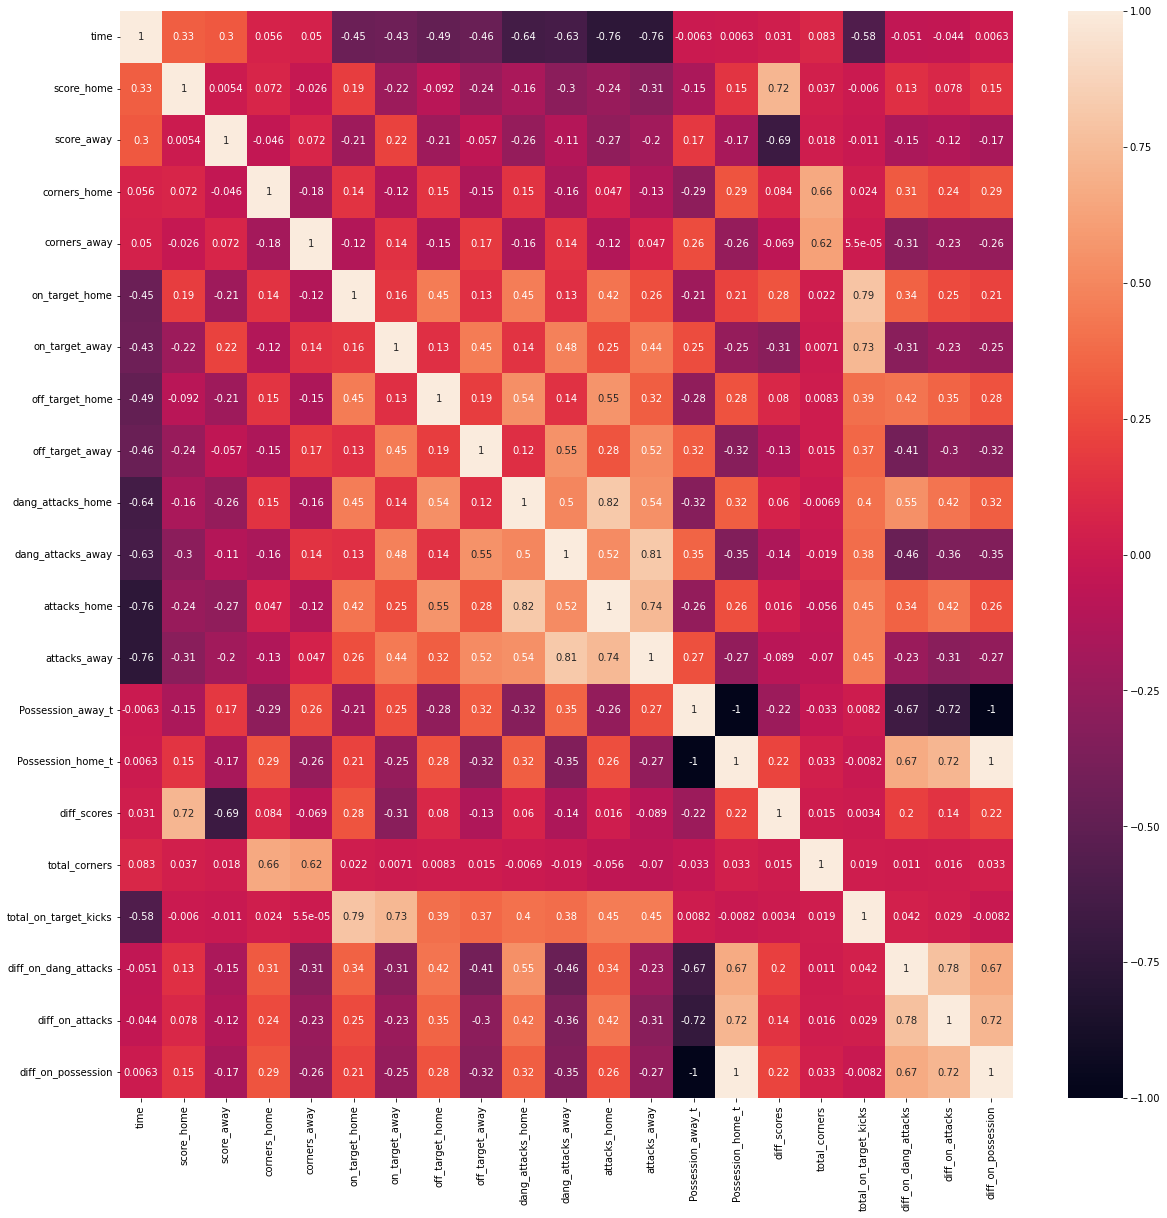

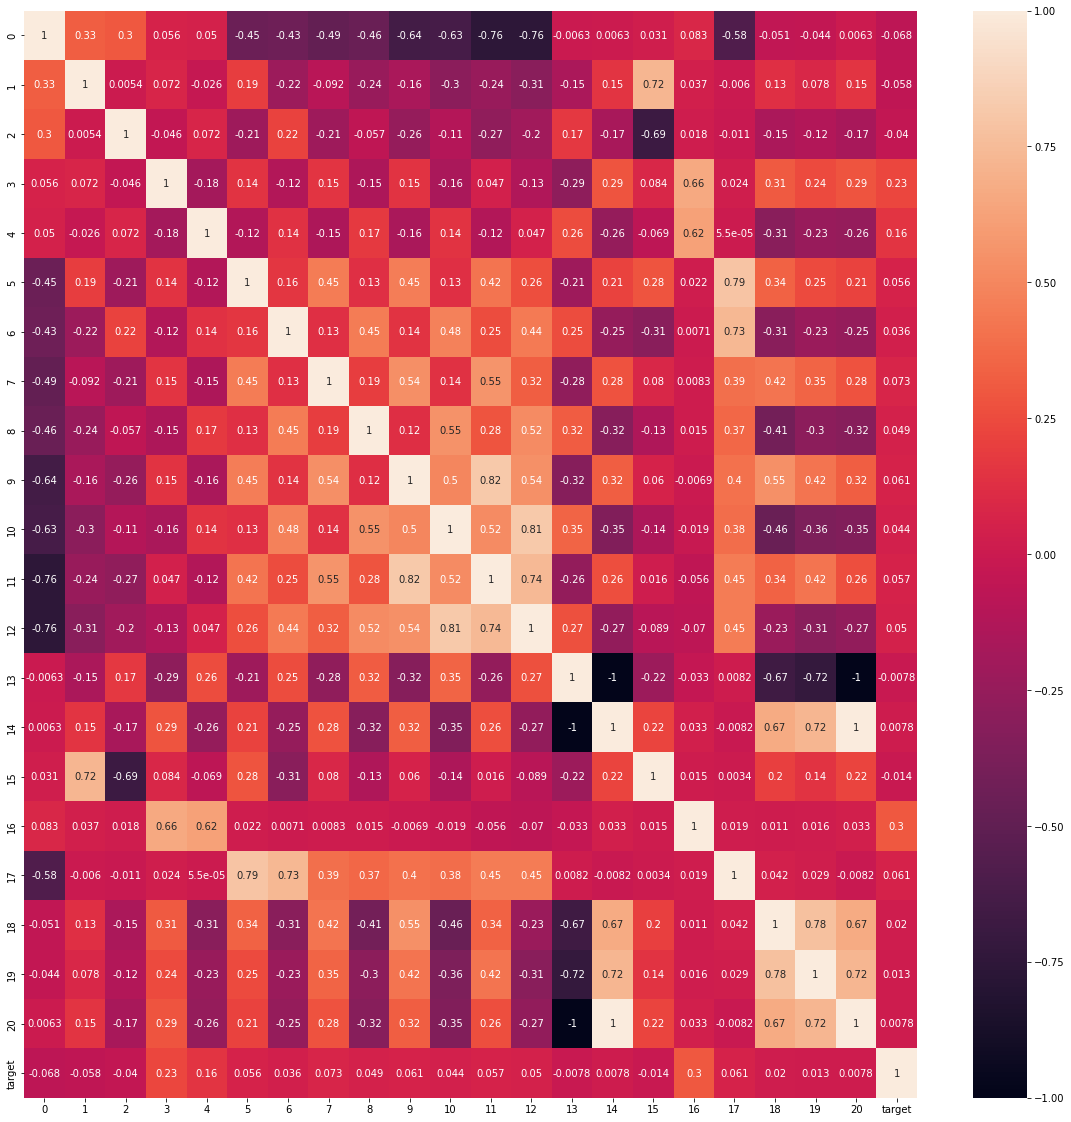

In [32]:

#Imprimindo a matriz de correlação entre as variáveis
correlation_m = x_general.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_m, annot=True)
plt.show()

x_df = pd.DataFrame(X_1)
x_df['target'] = pd.DataFrame(Y_1)

#Imprimindo a matriz de correlação entre as variáveis
correlation_m = x_df.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_m, annot=True)
plt.show()


In [33]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size = 0.3, random_state=10)
X_H_train, X_H_test, y_H_train, y_H_test = train_test_split(X_1H, Y_1H, test_size = 0.3, random_state=10)
X_L_train, X_L_test, y_L_train, y_L_test = train_test_split(X_1L, Y_1L, test_size = 0.3, random_state=10)

In [273]:
svc = SVC(random_state=10)
# defining parameter range for svm
param_grid = {'C': [0.1, 0.6, 1, 10,],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# define random search for SVM
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=10, random_state=10)
search = RandomizedSearchCV(svc, param_grid, n_iter=20, scoring='precision', n_jobs=4, cv=cv, random_state=10)


In [274]:

# execute search
result_svc = search.fit(X_train, y_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc.best_score_)
print('Best Hyperparameters: %s' % result_svc.best_params_)


/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetri

=========Random Search Results for SVM==========
Best Score: 0.7814520218343748
Best Hyperparameters: {'kernel': 'sigmoid', 'gamma': 0.01, 'C': 0.6}


In [275]:
# IMprimindo o classification report
modelo = result_svc.best_estimator_
y_pred =  modelo.predict(X_test)

print (classification_report(y_test,y_pred))

print (confusion_matrix(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.98      0.69       899
           1       0.82      0.08      0.15       840

    accuracy                           0.55      1739
   macro avg       0.68      0.53      0.42      1739
weighted avg       0.67      0.55      0.43      1739

[[884  15]
 [773  67]]


In [276]:
# execute search
result_svc_H = search.fit(X_H_train, y_H_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc_H.best_score_)
print('Best Hyperparameters: %s' % result_svc_H.best_params_)

=========Random Search Results for SVM==========
Best Score: 0.6698979570655187
Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 0.6}


In [277]:
# IMprimindo o classification report
modelo = result_svc_H.best_estimator_
print (classification_report(y_H_test, modelo.predict(X_H_test)[:10]))

print (confusion_matrix(y_H_test, modelo.predict(X_H_test)))

ValueError: Found input variables with inconsistent numbers of samples: [870, 10]

In [ ]:
# execute search
result_svc_L = search.fit(X_L_train, y_L_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc_L.best_score_)
print('Best Hyperparameters: %s' % result_svc_L.best_params_)

/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetri

=========Random Search Results for SVM==========
Best Score: 0.7576310584839996
Best Hyperparameters: {'kernel': 'sigmoid', 'gamma': 1, 'C': 0.1}


In [ ]:
# IMprimindo o classification report
modelo = result_svc_L.best_estimator_
print (classification_report(y_L_test, modelo.predict(X_L_test)))

print (confusion_matrix(y_L_test, modelo.predict(X_L_test)))

              precision    recall  f1-score   support

       False       0.57      0.97      0.71       477
        True       0.73      0.09      0.17       393

    accuracy                           0.57       870
   macro avg       0.65      0.53      0.44       870
weighted avg       0.64      0.57      0.47       870

[[463  14]
 [356  37]]


In [266]:
mlp = MLPClassifier()
# defining parameter range for MLP
layer_details = [(14,),(10,), (12,10,), (18,), (18,14,), (18,14,2,), (10,10,)]
param_grid = {'activation':['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':layer_details,
              'solver':['lbfgs', 'sgd', 'adam'],
              'alpha':[1., .1, .01, .001, .0001, .00001],}


# define random search for MLP
search = RandomizedSearchCV(mlp, param_grid, n_iter=40, scoring='precision', n_jobs=4, cv=cv, random_state=10)

# execute search
result_mlp = search.fit(X_train, y_train)

# summarize result for MLP
print('=========Random Search Results for MLP==========')
print('Best Score: %s' % result_mlp.best_score_)
print('Best Hyperparameters: %s' % result_mlp.best_params_)

/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetri

=========Random Search Results for MLP==========
Best Score: 0.6433779701670413
Best Hyperparameters: {'solver': 'adam', 'hidden_layer_sizes': (18, 14), 'alpha': 0.0001, 'activation': 'identity'}


Resultados MLP

In [267]:
# IMprimindo o classification report
modelo = result_mlp.best_estimator_
print (classification_report(y_test, modelo.predict(X_test)))

print (confusion_matrix(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64       899
           1       0.61      0.61      0.61       840

    accuracy                           0.62      1739
   macro avg       0.62      0.62      0.62      1739
weighted avg       0.62      0.62      0.62      1739

[[574 325]
 [331 509]]


In [268]:
mlp = MLPClassifier()
# defining parameter range for MLP
layer_details = [(14,),(10,), (12,10,), (18,), (18,14,), (18,14,2,), (10,10,)]
param_grid = {'activation':['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':layer_details,
              'solver':['lbfgs', 'sgd', 'adam'],
              'alpha':[1., .1, .01, .001, .0001, .00001],}


# define random search for MLP
search = RandomizedSearchCV(mlp, param_grid, n_iter=40, scoring='precision', n_jobs=4, cv=cv, random_state=10)

# execute search
result_mlp = search.fit(X_H_train, y_H_train)

# summarize result for MLP
print('=========Random Search Results for MLP==========')
print('Best Score: %s' % result_mlp.best_score_)
print('Best Hyperparameters: %s' % result_mlp.best_params_)

/home/adriel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/adriel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/adriel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/adriel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/adriel/.local/lib/python3.8/site-packages/skle

=========Random Search Results for MLP==========
Best Score: 0.66826788560143
Best Hyperparameters: {'solver': 'adam', 'hidden_layer_sizes': (12, 10), 'alpha': 0.1, 'activation': 'tanh'}


In [269]:
# IMprimindo o classification report
modelo = result_mlp.best_estimator_
print (classification_report(y_H_test, modelo.predict(X_H_test)))

print (confusion_matrix(y_H_test, modelo.predict(X_H_test)))

              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59       412
         1.0       0.63      0.63      0.63       458

    accuracy                           0.61       870
   macro avg       0.61      0.61      0.61       870
weighted avg       0.61      0.61      0.61       870

[[244 168]
 [169 289]]


In [270]:
mlp = MLPClassifier()
# defining parameter range for MLP
layer_details = [(14,),(10,), (12,10,), (18,), (18,14,), (18,14,2,), (10,10,)]
param_grid = {'activation':['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':layer_details,
              'solver':['lbfgs', 'sgd', 'adam'],
              'alpha':[1., .1, .01, .001, .0001, .00001],}


# define random search for MLP
search = RandomizedSearchCV(mlp, param_grid, n_iter=40, scoring='precision', n_jobs=4, cv=cv, random_state=10)

# execute search
result_mlp = search.fit(X_L_train, y_L_train)

# summarize result for MLP
print('=========Random Search Results for MLP==========')
print('Best Score: %s' % result_mlp.best_score_)
print('Best Hyperparameters: %s' % result_mlp.best_params_)

/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetri

=========Random Search Results for MLP==========
Best Score: 0.6470257130569634
Best Hyperparameters: {'solver': 'sgd', 'hidden_layer_sizes': (12, 10), 'alpha': 1.0, 'activation': 'identity'}


/home/adriel/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [271]:
# IMprimindo o classification report
modelo = result_mlp.best_estimator_
print (classification_report(y_L_test, modelo.predict(X_L_test)))

print (confusion_matrix(y_L_test, modelo.predict(X_L_test)))

              precision    recall  f1-score   support

         0.0       0.62      0.83      0.71       477
         1.0       0.65      0.38      0.48       393

    accuracy                           0.63       870
   macro avg       0.63      0.60      0.59       870
weighted avg       0.63      0.63      0.60       870

[[396  81]
 [245 148]]


In [278]:
decisionTree = DecisionTreeClassifier()

# define search space for decision tree
space = dict()
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = [2,3,4,5,6,7,8,9]
space['max_depth'] = [3,5,6,7,9,11,13,15,17,19,20,21,22,23,24,25]
space['min_samples_leaf'] = [2,3,4,5,6]

# define random search for decision tree
search = RandomizedSearchCV(decisionTree, space, n_iter=50, scoring='precision', n_jobs=4, cv=cv, random_state=10)

# execute search
result_tree = search.fit(X_H_train, y_H_train)

# summarize result for decision tree
print('=========Random Search Results fro TREE==========')
print('Best Score: %s' % result_tree.best_score_)
print('Best Hyperparameters: %s' % result_tree.best_params_)

=========Random Search Results fro TREE==========
Best Score: 0.6552492348098142
Best Hyperparameters: {'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 3, 'criterion': 'entropy'}


In [280]:
# Imprimindo o classification report
modelo = result_tree.best_estimator_
print (classification_report(y_H_test, modelo.predict(X_H_test)))
print (confusion_matrix(y_H_test, modelo.predict(X_H_test)))

              precision    recall  f1-score   support

         0.0       0.63      0.50      0.56       412
         1.0       0.62      0.74      0.68       458

    accuracy                           0.63       870
   macro avg       0.63      0.62      0.62       870
weighted avg       0.63      0.63      0.62       870

[[208 204]
 [120 338]]


#Comitê com voto majoritário

In [ ]:
def majoritarian_vote(pred_1, pred_2, pred_3):
  prediction = []
  for index, ans in enumerate(pred_1):
    sumFalse = 0
    sumTrue = 0
    answer = True

    if ans == True:
      sumTrue += 1
    else:
      sumFalse += 1

    if pred_2[index] == True:
      sumTrue += 1
    else:
      sumFalse += 1

    if pred_3[index] == True:
      sumTrue += 1
    else:
      sumFalse += 1

    if sumFalse > sumTrue:
      answer = False

    prediction.append(answer)

  return prediction

In [ ]:
tree_vote = result_tree.best_estimator_.predict(X_test)
mlp_vote = result_mlp.best_estimator_.predict(X_test)
svm_vote = result_svc.best_estimator_.predict(X_test)
answers = majoritarian_vote(tree_vote, mlp_vote, svm_vote)   

ValueError: X.shape[1] = 21 should be equal to 20, the number of features at training time

In [ ]:
# Imprimindo o classification report
print (classification_report(y_test, answers))
print (confusion_matrix(y_test, answers))

NameError: name 'answers' is not defined

AUTOENCODER ANN

In [34]:
from torch import nn
from torch import optim
import torchvision
import torch
import numpy as np
import matplotlib.pyplot as plt

In [77]:
class Encoder(nn.Module):
    def __init__(self, input_shape):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=input_shape, out_features=12
        )
        self.encoder_output_layer = nn.Linear(
            in_features=12, out_features=8
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=8, out_features=12
        )
        self.decoder_output_layer = nn.Linear(
            in_features=12, out_features=input_shape
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

In [78]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = Encoder(21).to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# mean-squared error loss
criterion = nn.MSELoss()

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

In [80]:
epochs = 100
for epoch in range(epochs):
    loss = 0
    for batch_features in X_train:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        #batch_features = batch_features.view(-1, 784).to(device)
        batch_features = torch.from_numpy(batch_features).to(device).float()
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(X_train)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/100, loss = 0.037340
epoch : 2/100, loss = 0.030654
epoch : 3/100, loss = 0.020462
epoch : 4/100, loss = 0.015744
epoch : 5/100, loss = 0.015652
epoch : 6/100, loss = 0.015596
epoch : 7/100, loss = 0.015549
epoch : 8/100, loss = 0.015484
epoch : 9/100, loss = 0.015387
epoch : 10/100, loss = 0.015333
epoch : 11/100, loss = 0.015313
epoch : 12/100, loss = 0.015292
epoch : 13/100, loss = 0.015270
epoch : 14/100, loss = 0.015257
epoch : 15/100, loss = 0.015248
epoch : 16/100, loss = 0.015240
epoch : 17/100, loss = 0.015235
epoch : 18/100, loss = 0.015229
epoch : 19/100, loss = 0.015224
epoch : 20/100, loss = 0.015219
epoch : 21/100, loss = 0.015215
epoch : 22/100, loss = 0.015213
epoch : 23/100, loss = 0.015211
epoch : 24/100, loss = 0.015209
epoch : 25/100, loss = 0.015208
epoch : 26/100, loss = 0.015206
epoch : 27/100, loss = 0.015204
epoch : 28/100, loss = 0.015203
epoch : 29/100, loss = 0.015200
epoch : 30/100, loss = 0.015196
epoch : 31/100, loss = 0.015181
epoch : 32/100, l

In [214]:
import cv2
plt.imshow(batch_features[0].cpu().detach().numpy().reshape(28,28))

ValueError: cannot reshape array of size 1 into shape (28,28)

In [215]:
plt.imshow(outputs[0].cpu().detach().numpy().reshape(28,28))

ValueError: cannot reshape array of size 1 into shape (28,28)

In [216]:
from collections import Counter
Counter(y_train)
Counter(y_test)

Counter({1: 840, 0: 899})

In [4]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size = 0.3, random_state=10)
X_H_train, X_H_test, y_H_train, y_H_test = train_test_split(X_1H, Y_1H, test_size = 0.3, random_state=10)
X_L_train, X_L_test, y_L_train, y_L_test = train_test_split(X_1L, Y_1L, test_size = 0.3, random_state=10)

NameError: name 'train_test_split' is not defined

In [240]:
activation = model.encoder_hidden_layer(torch.from_numpy(X_train).to(device).float())
activation = torch.relu(activation)
code = model.encoder_output_layer(activation)
code = torch.relu(code).detach().cpu().numpy()

In [241]:
svc = SVC(random_state=10)
# defining parameter range for svm
param_grid = {'C': [0.1, 0.6, 1, 10,],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# define random search for SVM
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=10, random_state=10)
search = RandomizedSearchCV(svc, param_grid, n_iter=20, scoring='precision', n_jobs=4, cv=cv, random_state=10)

In [242]:
# execute search
result_svc = search.fit(code, y_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc.best_score_)
print('Best Hyperparameters: %s' % result_svc.best_params_)

/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetri

=========Random Search Results for SVM==========
Best Score: 0.678055804365641
Best Hyperparameters: {'kernel': 'sigmoid', 'gamma': 0.1, 'C': 0.1}


In [243]:
modelo = result_svc.best_estimator_

activation = model.encoder_hidden_layer(torch.from_numpy(X_test).to(device).float())
activation = torch.relu(activation)
code = model.encoder_output_layer(activation)
code = torch.relu(code).detach().cpu().numpy()
y_pred =  modelo.predict(code)
print (classification_report(y_test,y_pred))

print (confusion_matrix(y_test, modelo.predict(code)))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63       899
           1       0.58      0.45      0.50       840

    accuracy                           0.58      1739
   macro avg       0.58      0.57      0.57      1739
weighted avg       0.58      0.58      0.57      1739

[[625 274]
 [465 375]]


In [244]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = Encoder(20).to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# mean-squared error loss
criterion = nn.MSELoss()


In [245]:
epochs = 100
for epoch in range(epochs):
    loss = 0
    for batch_features in X_H_train:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        #batch_features = batch_features.view(-1, 784).to(device)
        batch_features = torch.from_numpy(batch_features).to(device).float()
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/100, loss = 0.145296
epoch : 2/100, loss = 0.122046
epoch : 3/100, loss = 0.117981
epoch : 4/100, loss = 0.110820
epoch : 5/100, loss = 0.110226
epoch : 6/100, loss = 0.109669
epoch : 7/100, loss = 0.108204
epoch : 8/100, loss = 0.106742
epoch : 9/100, loss = 0.106383
epoch : 10/100, loss = 0.106222
epoch : 11/100, loss = 0.106105
epoch : 12/100, loss = 0.106018
epoch : 13/100, loss = 0.105940
epoch : 14/100, loss = 0.105879
epoch : 15/100, loss = 0.105832
epoch : 16/100, loss = 0.105796
epoch : 17/100, loss = 0.105760
epoch : 18/100, loss = 0.105736
epoch : 19/100, loss = 0.105719
epoch : 20/100, loss = 0.105705
epoch : 21/100, loss = 0.105694
epoch : 22/100, loss = 0.105674
epoch : 23/100, loss = 0.105669
epoch : 24/100, loss = 0.105651
epoch : 25/100, loss = 0.105648
epoch : 26/100, loss = 0.105633
epoch : 27/100, loss = 0.105630
epoch : 28/100, loss = 0.105621
epoch : 29/100, loss = 0.105611
epoch : 30/100, loss = 0.105604
epoch : 31/100, loss = 0.105608
epoch : 32/100, l

In [246]:
activation = model.encoder_hidden_layer(torch.from_numpy(X_H_train).to(device).float())
activation = torch.relu(activation)
code = model.encoder_output_layer(activation)
code = torch.relu(code).detach().cpu().numpy()

In [247]:
# execute search
result_svc = search.fit(code, y_H_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc.best_score_)
print('Best Hyperparameters: %s' % result_svc.best_params_)

=========Random Search Results for SVM==========
Best Score: 0.6752551624379245
Best Hyperparameters: {'kernel': 'poly', 'gamma': 1, 'C': 0.6}


In [248]:
modelo = result_svc.best_estimator_

activation = model.encoder_hidden_layer(torch.from_numpy(X_H_test).to(device).float())
activation = torch.relu(activation)
code = model.encoder_output_layer(activation)
code = torch.relu(code).detach().cpu().numpy()
y_pred =  modelo.predict(code)
print (classification_report(y_H_test,y_pred))

print (confusion_matrix(y_H_test, modelo.predict(code)))

              precision    recall  f1-score   support

         0.0       0.57      0.69      0.63       412
         1.0       0.66      0.53      0.59       458

    accuracy                           0.61       870
   macro avg       0.61      0.61      0.61       870
weighted avg       0.62      0.61      0.60       870

[[286 126]
 [216 242]]


In [249]:
epochs = 100
for epoch in range(epochs):
    loss = 0
    for batch_features in X_L_train:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        #batch_features = batch_features.view(-1, 784).to(device)
        batch_features = torch.from_numpy(batch_features).to(device).float()
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/100, loss = 0.051876
epoch : 2/100, loss = 0.050518
epoch : 3/100, loss = 0.049841
epoch : 4/100, loss = 0.049405
epoch : 5/100, loss = 0.049088
epoch : 6/100, loss = 0.048846
epoch : 7/100, loss = 0.048649
epoch : 8/100, loss = 0.048472
epoch : 9/100, loss = 0.048347
epoch : 10/100, loss = 0.048259
epoch : 11/100, loss = 0.048178
epoch : 12/100, loss = 0.048125
epoch : 13/100, loss = 0.048094
epoch : 14/100, loss = 0.048068
epoch : 15/100, loss = 0.048051
epoch : 16/100, loss = 0.048038
epoch : 17/100, loss = 0.048045
epoch : 18/100, loss = 0.048033
epoch : 19/100, loss = 0.048029
epoch : 20/100, loss = 0.048015
epoch : 21/100, loss = 0.048010
epoch : 22/100, loss = 0.048007
epoch : 23/100, loss = 0.048004
epoch : 24/100, loss = 0.048007
epoch : 25/100, loss = 0.047991
epoch : 26/100, loss = 0.047994
epoch : 27/100, loss = 0.047989
epoch : 28/100, loss = 0.047988
epoch : 29/100, loss = 0.047999
epoch : 30/100, loss = 0.047986
epoch : 31/100, loss = 0.047979
epoch : 32/100, l

In [250]:
activation = model.encoder_hidden_layer(torch.from_numpy(X_L_train).to(device).float())
activation = torch.relu(activation)
code = model.encoder_output_layer(activation)
code = torch.relu(code).detach().cpu().numpy()

In [251]:
# execute search
result_svc = search.fit(code, y_L_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc.best_score_)
print('Best Hyperparameters: %s' % result_svc.best_params_)

/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetri

=========Random Search Results for SVM==========
Best Score: 0.7324032827886707
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 1, 'C': 0.1}


In [252]:
modelo = result_svc.best_estimator_

activation = model.encoder_hidden_layer(torch.from_numpy(X_L_test).to(device).float())
activation = torch.relu(activation)
code = model.encoder_output_layer(activation)
code = torch.relu(code).detach().cpu().numpy()
y_pred =  modelo.predict(code)
print (classification_report(y_L_test,y_pred))

print (confusion_matrix(y_L_test, modelo.predict(code)))

              precision    recall  f1-score   support

         0.0       0.57      0.94      0.71       477
         1.0       0.66      0.16      0.25       393

    accuracy                           0.58       870
   macro avg       0.62      0.55      0.48       870
weighted avg       0.61      0.58      0.50       870

[[446  31]
 [332  61]]


In [253]:
epochs = 100
for epoch in range(epochs):
    loss = 0
    for batch_features in X_L_train:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        #batch_features = batch_features.view(-1, 784).to(device)
        batch_features = torch.from_numpy(batch_features).to(device).float()
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/100, loss = 0.047938
epoch : 2/100, loss = 0.047921
epoch : 3/100, loss = 0.047917
epoch : 4/100, loss = 0.047911
epoch : 5/100, loss = 0.047909
epoch : 6/100, loss = 0.047913
epoch : 7/100, loss = 0.047893
epoch : 8/100, loss = 0.047903
epoch : 9/100, loss = 0.047926
epoch : 10/100, loss = 0.047904
epoch : 11/100, loss = 0.047895
epoch : 12/100, loss = 0.047904
epoch : 13/100, loss = 0.047886
epoch : 14/100, loss = 0.047888
epoch : 15/100, loss = 0.047880
epoch : 16/100, loss = 0.047873
epoch : 17/100, loss = 0.047865
epoch : 18/100, loss = 0.047898
epoch : 19/100, loss = 0.047857
epoch : 20/100, loss = 0.047864
epoch : 21/100, loss = 0.047863
epoch : 22/100, loss = 0.047863
epoch : 23/100, loss = 0.047885
epoch : 24/100, loss = 0.047855
epoch : 25/100, loss = 0.047884
epoch : 26/100, loss = 0.047890
epoch : 27/100, loss = 0.047892
epoch : 28/100, loss = 0.047871
epoch : 29/100, loss = 0.047883
epoch : 30/100, loss = 0.047861
epoch : 31/100, loss = 0.047879
epoch : 32/100, l

In [254]:
activation = model.encoder_hidden_layer(torch.from_numpy(X_L_train).to(device).float())
activation = torch.relu(activation)
code = model.encoder_output_layer(activation)
code = torch.relu(code).detach().cpu().numpy()

In [255]:
# execute search
result_svc = search.fit(code, y_L_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc.best_score_)
print('Best Hyperparameters: %s' % result_svc.best_params_)

/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adriel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetri

=========Random Search Results for SVM==========
Best Score: 0.7211228547795252
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 1, 'C': 0.1}


In [256]:
modelo = result_svc.best_estimator_

activation = model.encoder_hidden_layer(torch.from_numpy(X_L_test).to(device).float())
activation = torch.relu(activation)
code = model.encoder_output_layer(activation)
code = torch.relu(code).detach().cpu().numpy()
y_pred =  modelo.predict(code)
print (classification_report(y_L_test,y_pred))

print (confusion_matrix(y_L_test, modelo.predict(code)))

              precision    recall  f1-score   support

         0.0       0.59      0.91      0.71       477
         1.0       0.67      0.22      0.33       393

    accuracy                           0.60       870
   macro avg       0.63      0.57      0.52       870
weighted avg       0.63      0.60      0.54       870

[[436  41]
 [308  85]]


In [257]:
class RBF:

    def __init__(self, X, y, tX, ty, num_of_classes,
                 k, std_from_clusters=True):
        self.X = X
        self.y = y

        self.tX = tX
        self.ty = ty

        self.number_of_classes = num_of_classes
        self.k = k
        self.std_from_clusters = std_from_clusters

    def convert_to_one_hot(self, x, num_of_classes):
        arr = np.zeros((len(x), num_of_classes))
        for i in range(len(x)):
            c = int(x[i])
            arr[i][c] = 1
        return arr

    def rbf(self, x, c, s):
        distance = get_distance(x, c)
        return 1 / np.exp(-distance / s ** 2)

    def rbf_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)
    def fit(self):
    
        self.centroids, self.std_list = kmeans(self.X, self.k, max_iters=1000)
    
        if not self.std_from_clusters:
            dMax = np.max([get_distance(c1, c2) for c1 in self.centroids for c2 in self.centroids])
            self.std_list = np.repeat(dMax / np.sqrt(2 * self.k), self.k)
    
        RBF_X = self.rbf_list(self.X, self.centroids, self.std_list)
    
        self.w = np.linalg.pinv(RBF_X.T @ RBF_X) @ RBF_X.T @ self.convert_to_one_hot(self.y, self.number_of_classes)
    
        RBF_list_tst = self.rbf_list(self.tX, self.centroids, self.std_list)
    
        self.pred_ty = RBF_list_tst @ self.w
    
        self.pred_ty = np.array([np.argmax(x) for x in self.pred_ty])
    
        diff = self.pred_ty - self.ty
    
        print('Accuracy: ', len(np.where(diff == 0)[0]) / len(diff))

In [258]:
import numpy as np


def get_distance(x1, x2):
    sum = 0
    for i in range(len(x1)):
        sum += (x1[i] - x2[i]) ** 2
    return np.sqrt(sum)


def kmeans(X, k, max_iters):
  
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    converged = False
    
    current_iter = 0

    while (not converged) and (current_iter < max_iters):

        cluster_list = [[] for i in range(len(centroids))]

        for x in X:  # Go through each data point
            distances_list = []
            for c in centroids:
                distances_list.append(get_distance(c, x))
            cluster_list[int(np.argmin(distances_list))].append(x)

        cluster_list = list((filter(None, cluster_list)))

        prev_centroids = centroids.copy()

        centroids = []

        for j in range(len(cluster_list)):
            centroids.append(np.mean(cluster_list[j], axis=0))

        pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))

        print('K-MEANS: ', int(pattern))

        converged = (pattern == 0)

        current_iter += 1

    return np.array(centroids), [np.std(x) for x in cluster_list]

In [259]:
RBF_CLASSIFIER = RBF(X_train, y_train, X_test, y_test, num_of_classes=2,
                     k=10, std_from_clusters=False)

RBF_CLASSIFIER.fit()

K-MEANS:  2
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
Accuracy:  0.5715928694652099


In [84]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data as data_utils
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

class cus2(torch.nn.Module):
    
    def __init__(self):
        super(cus2,self).__init__()
    
    def forward(self, outputs, labels):
        return (outputs-labels)**2

def custom_mean_square_error(y_predictions, target):
  square_difference = torch.square(y_predictions - target)
  loss_value = torch.mean(square_difference)
  return loss_value
    
class Encoder(nn.Module):
    def __init__(self, input_shape):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=input_shape, out_features=10
        )
        self.encoder_output_layer = nn.Linear(
            in_features=10, out_features=1
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.sigmoid(code)
        return code
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.MSELoss()
# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=1e-2)


model = Encoder(20).to(device)
learning_rate = .00001

        
epochs = 10
for epoch in range(epochs):
    loss = 0
    for batch_features, y in zip(X_H_train,y_H_train):
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        #batch_features = batch_features.view(-1, 784).to(device)
        batch_features = torch.from_numpy(batch_features).to(device).float()
        y = torch.tensor([y]).to(device).float()
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        # compute training reconstruction loss
        train_loss = criterion(outputs, y)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(X_H_train)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.10f}".format(epoch + 1, epochs, loss))

epoch : 1/10, loss = 0.2513334688
epoch : 2/10, loss = 0.2513334688
epoch : 3/10, loss = 0.2513334688
epoch : 4/10, loss = 0.2513334688
epoch : 5/10, loss = 0.2513334688
epoch : 6/10, loss = 0.2513334688
epoch : 7/10, loss = 0.2513334688
epoch : 8/10, loss = 0.2513334688
epoch : 9/10, loss = 0.2513334688
epoch : 10/10, loss = 0.2513334688
